In [3]:
from google.colab import drive
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import seaborn as sns

In [4]:
drive.mount('/content/drive')
name_of_file= 'kinopoisk.csv'
path = '/content/drive/My Drive/Colab Notebooks/AI_Course/Practice_2/'+ name_of_file
data_ab = pd.read_csv(path)

Mounted at /content/drive


In [5]:
mapping = {
    'film-item-rating-position__position': 'id',
    'film-item-rating-position__diff': 'pos',
    'selection-film-item-poster__rating': 'posterRating',
    'selection-film-item-meta__name': 'name',
    'rating__value': 'filmRating',
    'rating__count': 'ratingCount',
}
data_ab.rename(columns=mapping, inplace=True)

Null hypothesis: "Poster Rating" and "Film Rating" are the same. Rating is ordinal data and n = 2, therefore we use Mann Whitney U test.


In [13]:
data_ab

,id,pos,posterRating,name,filmRating,ratingCount
0,1,0,9.1,Зеленая миля,8.9,701 104
1,2,0,9.1,Побег из Шоушенка,8.9,790 958
2,3,0,8.6,Властелин колец: Возвращение короля,8.8,488 761
3,4,0,8.6,Властелин колец: Две крепости,8.8,476 404
4,5,0,8.6,Властелин колец: Братство Кольца,8.8,527 358
...,...,...,...,...,...,...
245,246,1,7.7,Марсианин,8.0,424 314
246,247,4,7.9,Радио,8.0,21 625
247,248,1,8.0,Ведьмина служба доставки,8.0,71 204
248,249,0,7.8,Константин: Повелитель тьмы,8.0,350 411


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


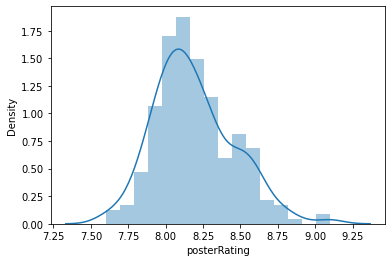

In [7]:
sns.distplot(data_ab['posterRating'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


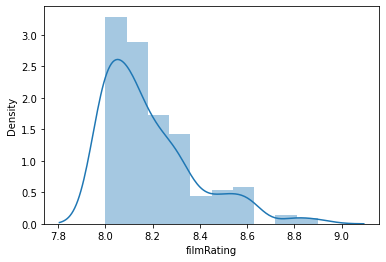

In [8]:
sns.distplot(data_ab['filmRating'])

In [10]:
temp = mannwhitneyu(data_ab['posterRating'], 
             data_ab['filmRating'])

In [20]:
print(f'pvalue: {temp[1]}')

pvalue: 0.44556711927309073


If pvalue > 0.05, then we accept the null hypothesis, 
else we do not accept the null hypothesis.

In [21]:
temp[1] > 0.05

True